This work is inspired from Sourav Banerjee's [Work](https://www.kaggle.com/code/iamsouravbanerjee/software-professional-salaries-starter-notebook/notebook).

**1. Importing packages and rough overview of the data.**

In [412]:
#Importing relevant packages for the analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
salary=pd.read_csv(Salary_Dataset_with_Extra_Features.csv)

In [415]:
display(salary)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [416]:
salary.info()
salary.duplicated().unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


array([False])

As we can see that there are no duplicates in the dataset, so there is no need to remove any data points.

In [417]:
salary.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


From the descriptives, we can see that there is a huge difference between mean salary and maximum salary. Therefore, I will mark that maximum salary data point as outlier.

In [418]:
for column_name in salary.columns:
    unique_values = len(salary[column_name].unique())
    print(" Dataset has '{unique_values}' unique '{column_name}'".format(column_name = column_name,unique_values=unique_values))

 Dataset has '41' unique 'Rating'
 Dataset has '11261' unique 'Company Name'
 Dataset has '1080' unique 'Job Title'
 Dataset has '316' unique 'Salary'
 Dataset has '82' unique 'Salaries Reported'
 Dataset has '10' unique 'Location'
 Dataset has '4' unique 'Employment Status'
 Dataset has '11' unique 'Job Roles'


**2. Exploratory Data Analysis.**



> 2.1 Which company pays the most salary?





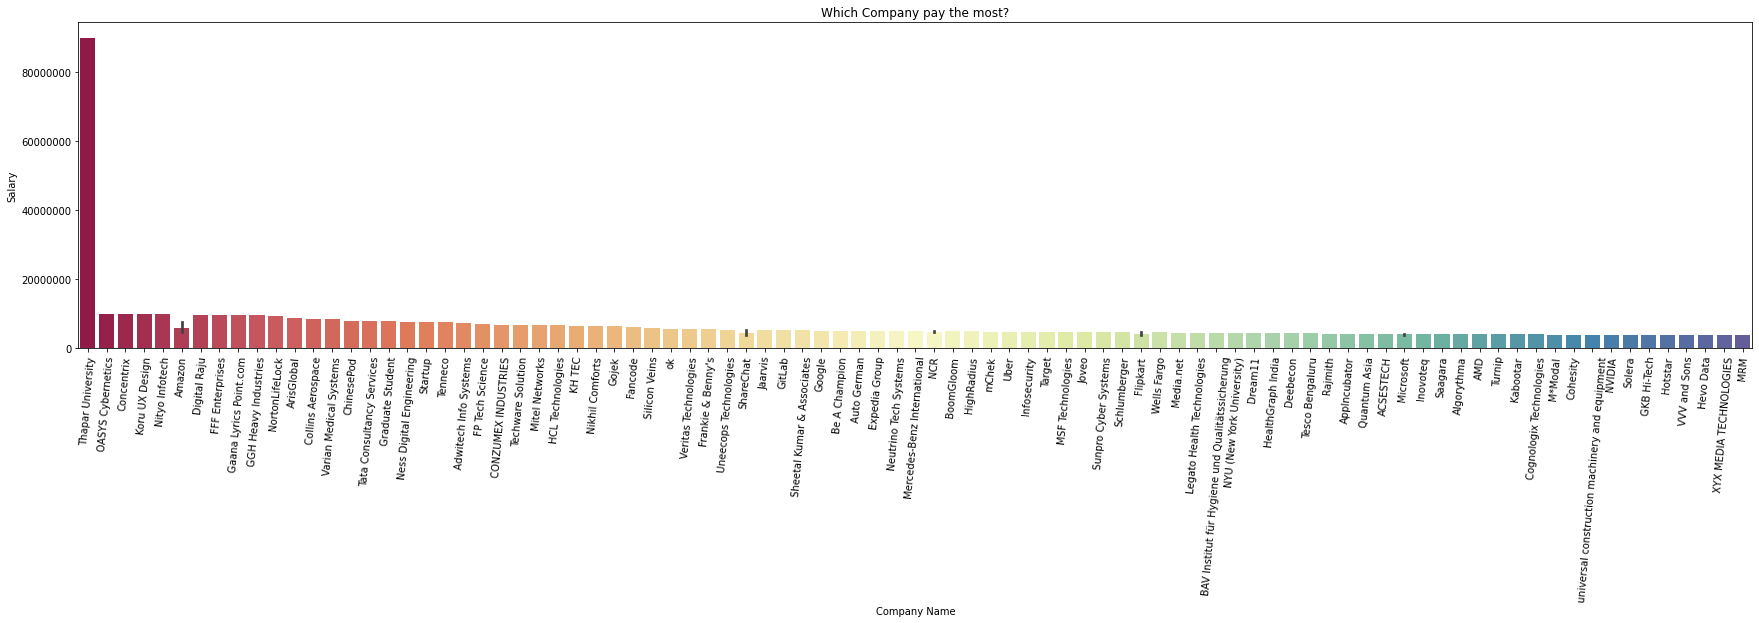

In [419]:
plt.figure(figsize = (30, 6))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'plain')
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = salary["Company Name"][0:100], y = salary["Salary"][0:100], palette = "Spectral").set(title='Which Company pay the most?');

As we can see there is one extremely high salary data point. There, I am going to exclude it from further analysis.



> 2.2 Which company pays the most? I have selected and plotted the data from top 100 companies that pays the highest salary.



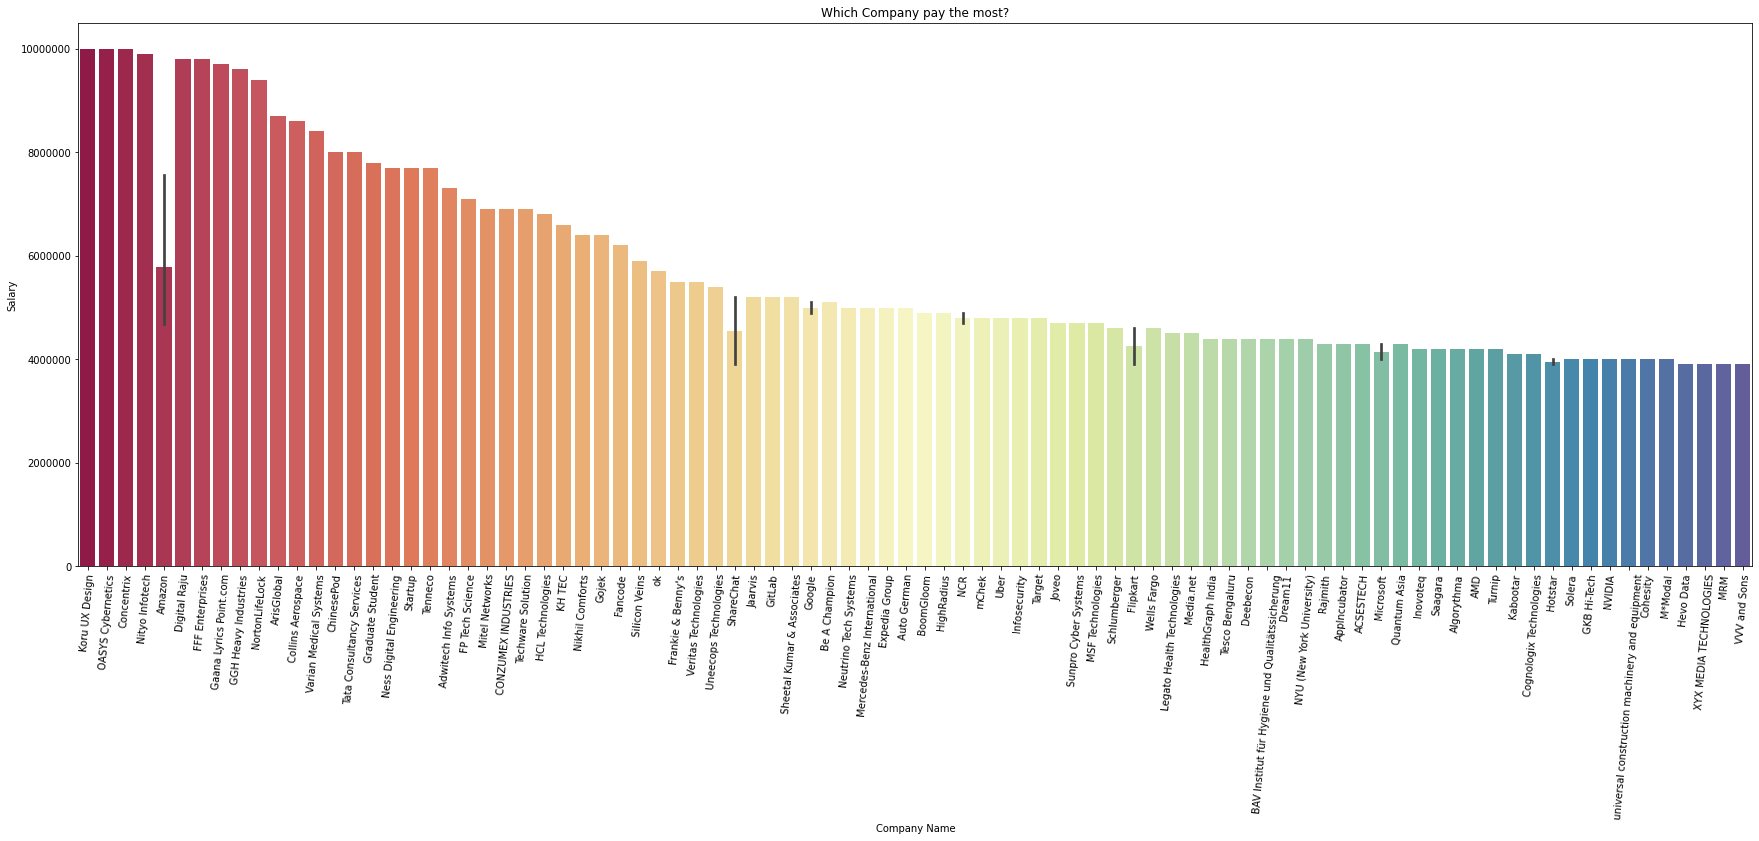

In [420]:
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'plain')
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = salary["Company Name"][1:100], y = salary["Salary"][1:100], palette = "Spectral").set(title='Which Company pay the most?');



> 2.3 Which compoany pays the least salary? I have selected the data from bottom 100 companies that pay the lowest salary.



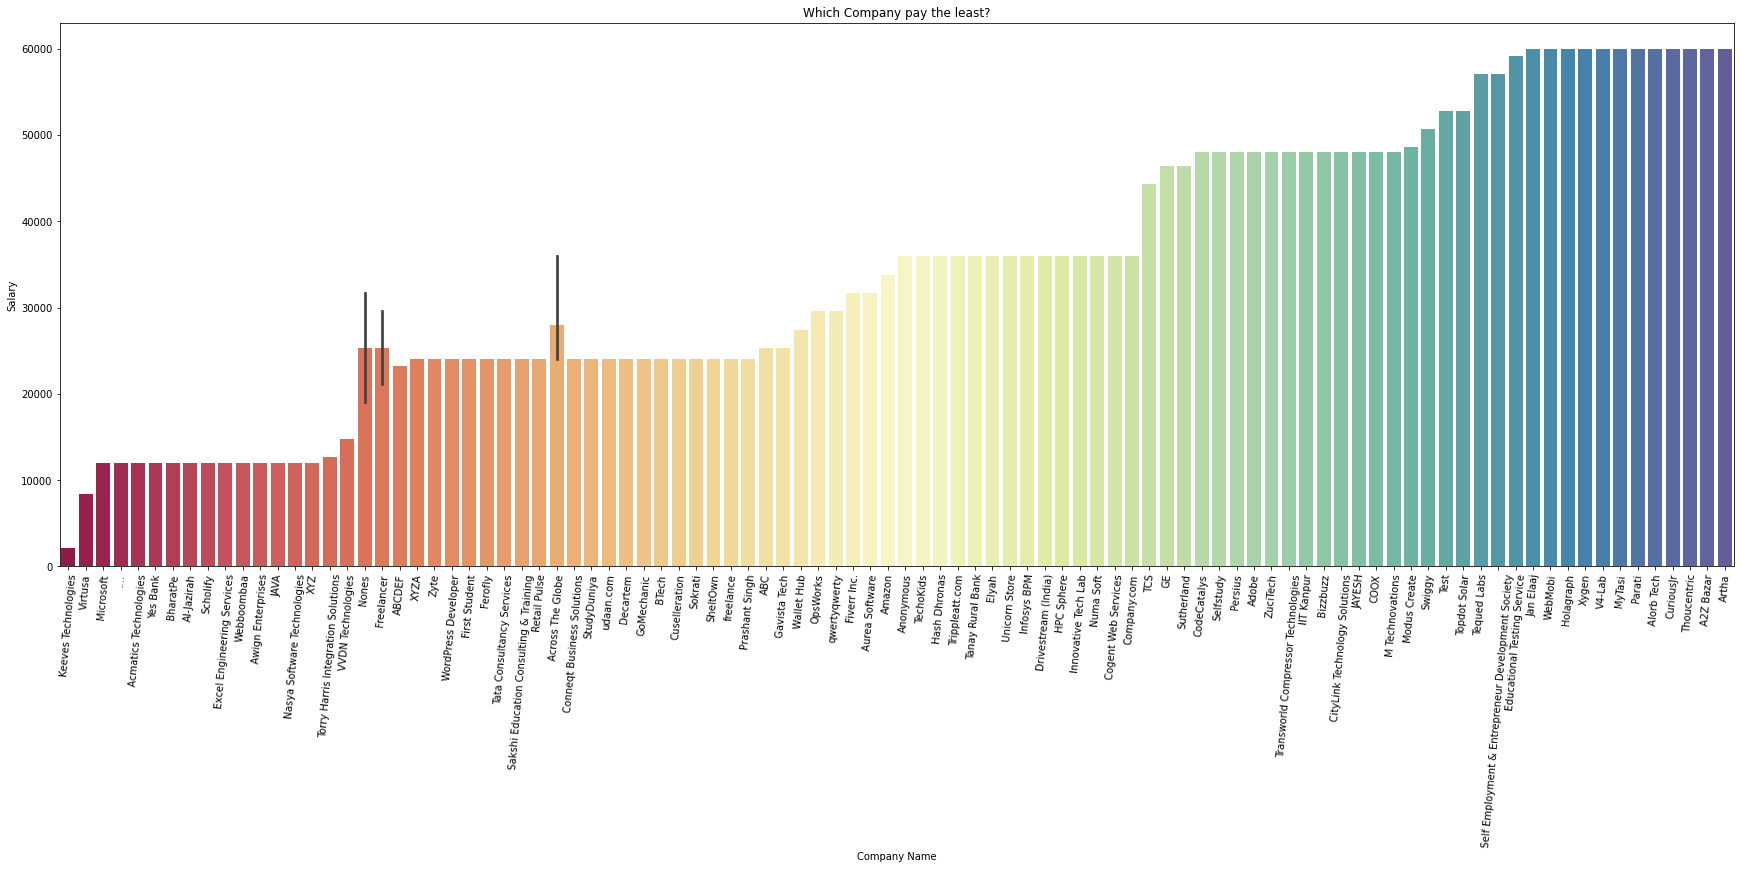

In [435]:
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'plain')
salary.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = salary["Company Name"][0:100], y = salary["Salary"][0:100], palette = "Spectral").set(title='Which Company pays the least?');



> 2.4 Does the company with higher ratings pay the highest salary?


> My hypothesis is that the highest rated company is paying the highest salaries.





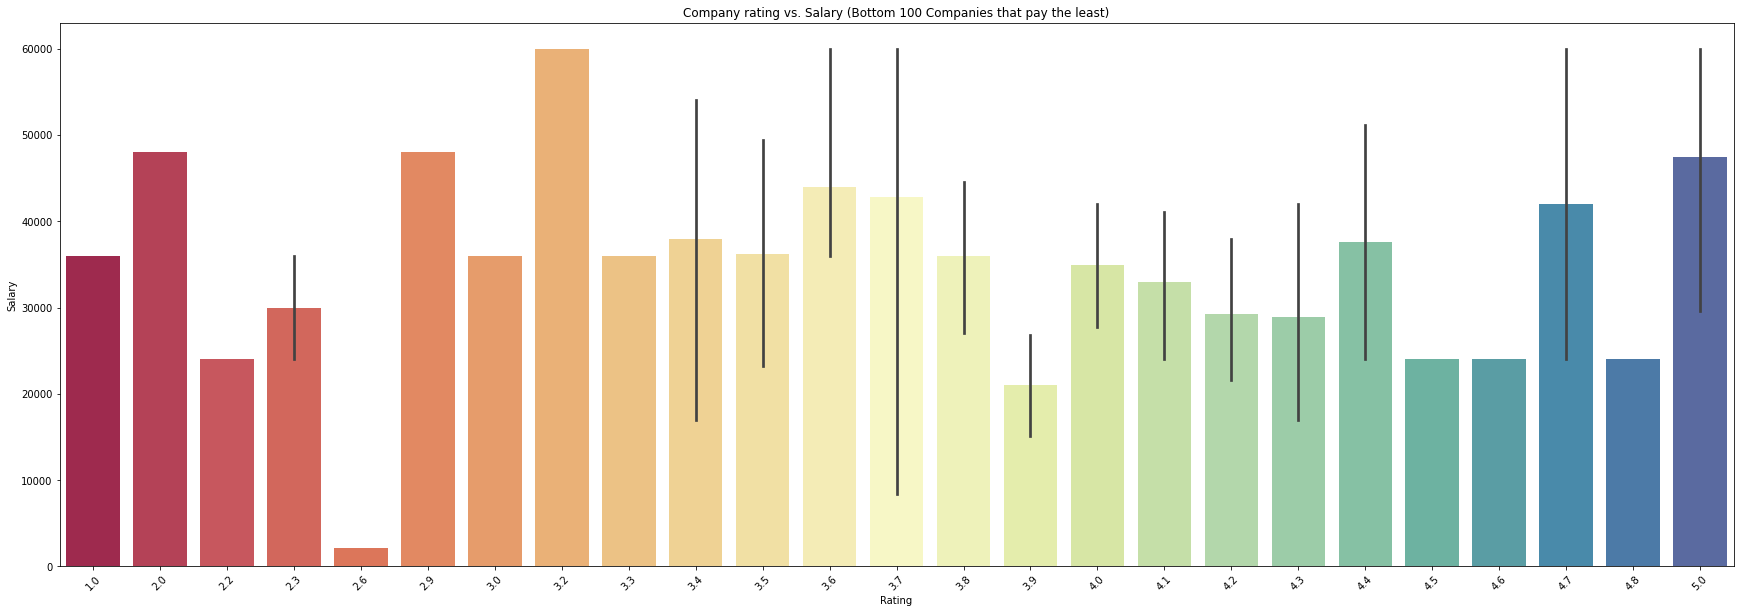

In [422]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = salary["Rating"][0:100], y = salary["Salary"][0:100], palette = "Spectral").set(title='Company rating vs. Salary (Bottom 100 Companies that pay the least)');

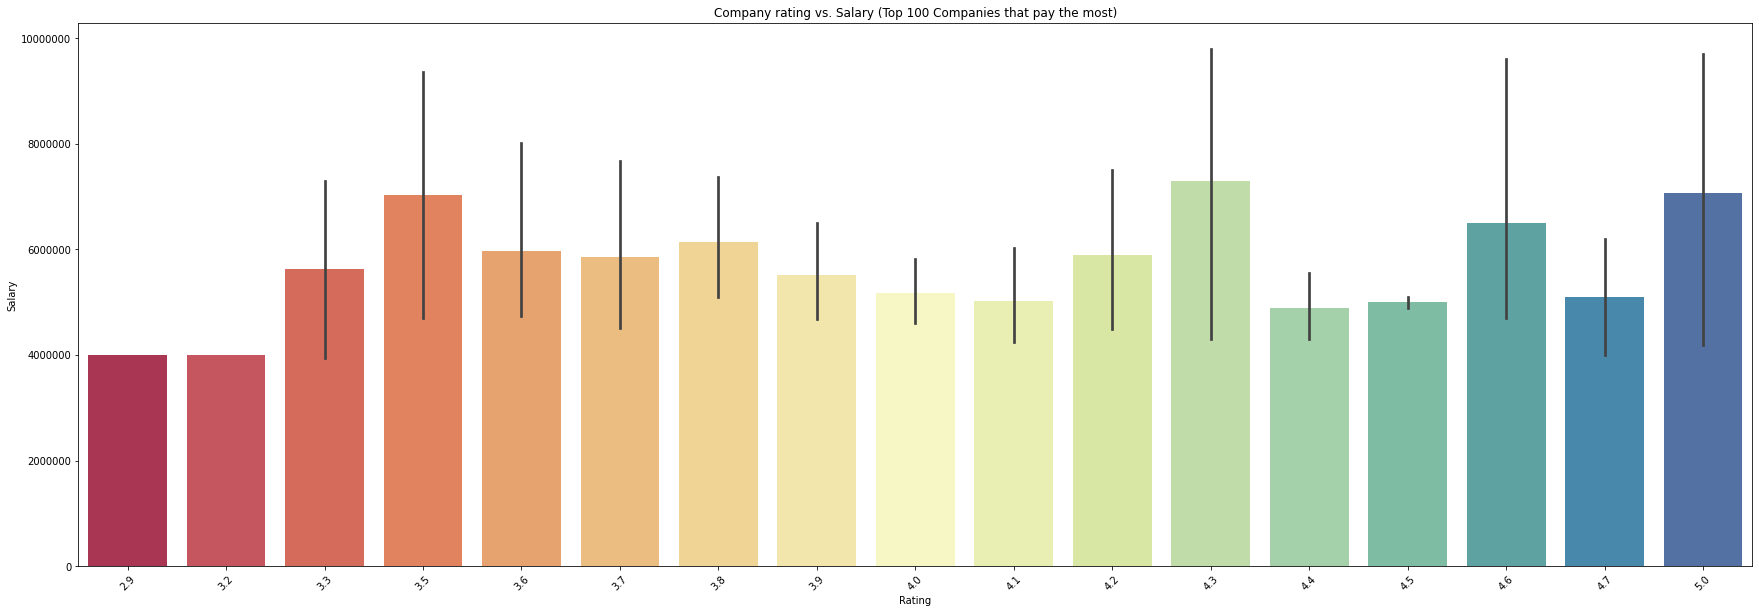

In [423]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = salary["Rating"][1:100], y = salary["Salary"][1:100] ,orient="v", palette = "Spectral").set(title='Company rating vs. Salary (Top 100 Companies that pay the most)');

In [424]:
column_1 = salary["Salary"]
column_2 = salary["Rating"]
correlation = column_1.corr(column_2)
print(correlation)

0.025476260428498817


As, we can see that there is not much difference in the ratings of company that pay the highest or lowest salary. So my hypothesis was wrong. Moreover, we can see that there is no correlation between the ratings of company and the salary paid by them. 



> 2.5 Does Location have any affect on Salary?



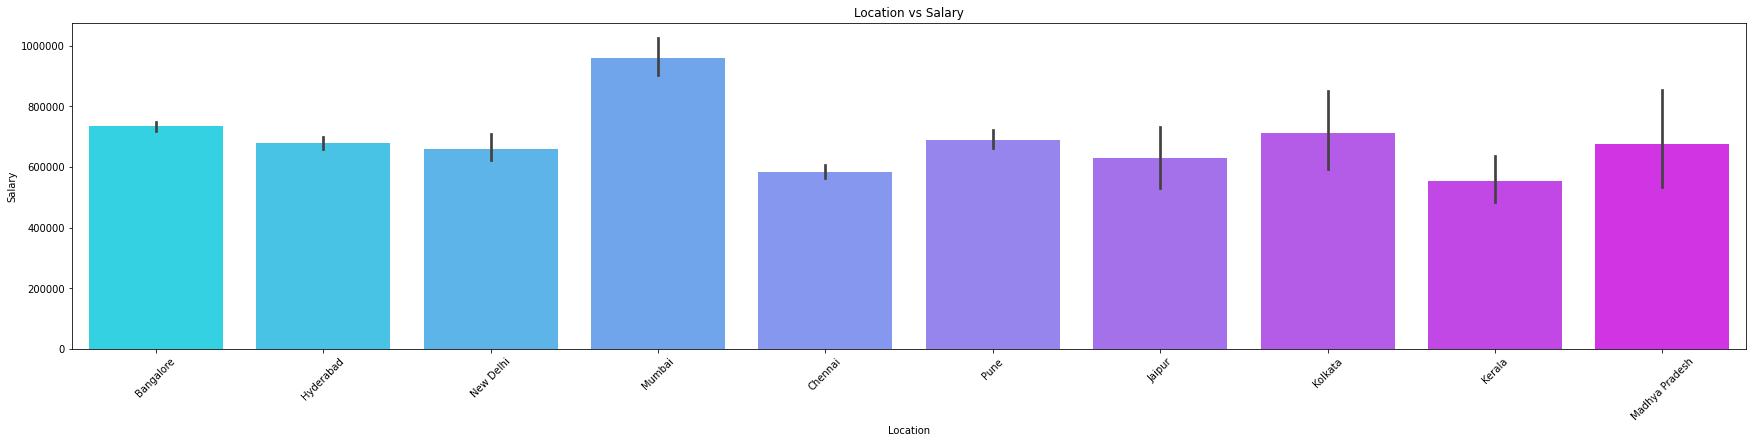

In [425]:
plt.figure(figsize = (30, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x=salary["Location"],y=salary["Salary"],palette="cool").set(title='Location vs Salary');

As we can see, employees living in expensive cities tend to get highest salaries among the rest.



> 2.6 Does some job role pay the higher salary?



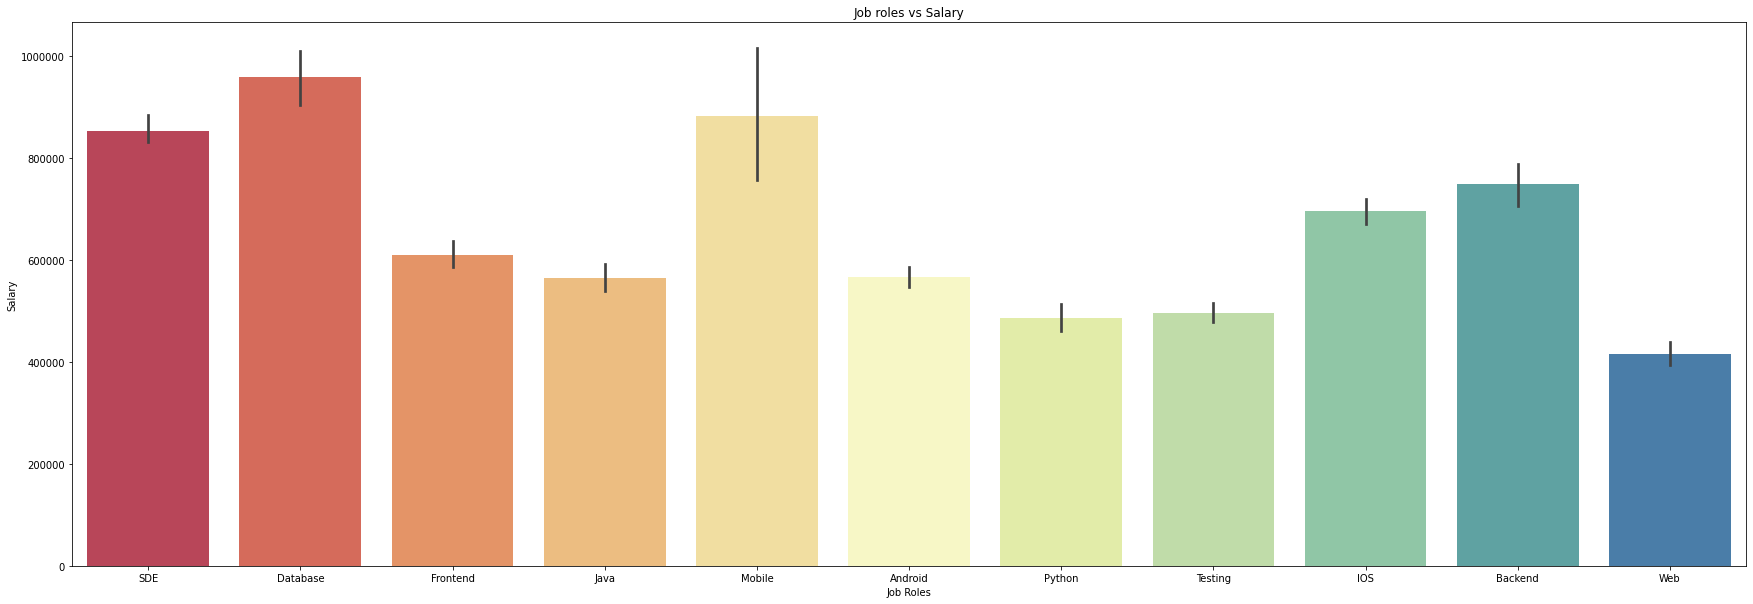

In [467]:
plt.figure(figsize=(30, 10))
plt.ticklabel_format(style='plain')
sns.barplot(x=salary["Job Roles"],y=salary["Salary"],palette="Spectral").set(title='Job roles vs Salary');

This shows that Database related roles and jobs play the highest salary among the others.



> 2.7 Does having a certain job title can get you higher salary?



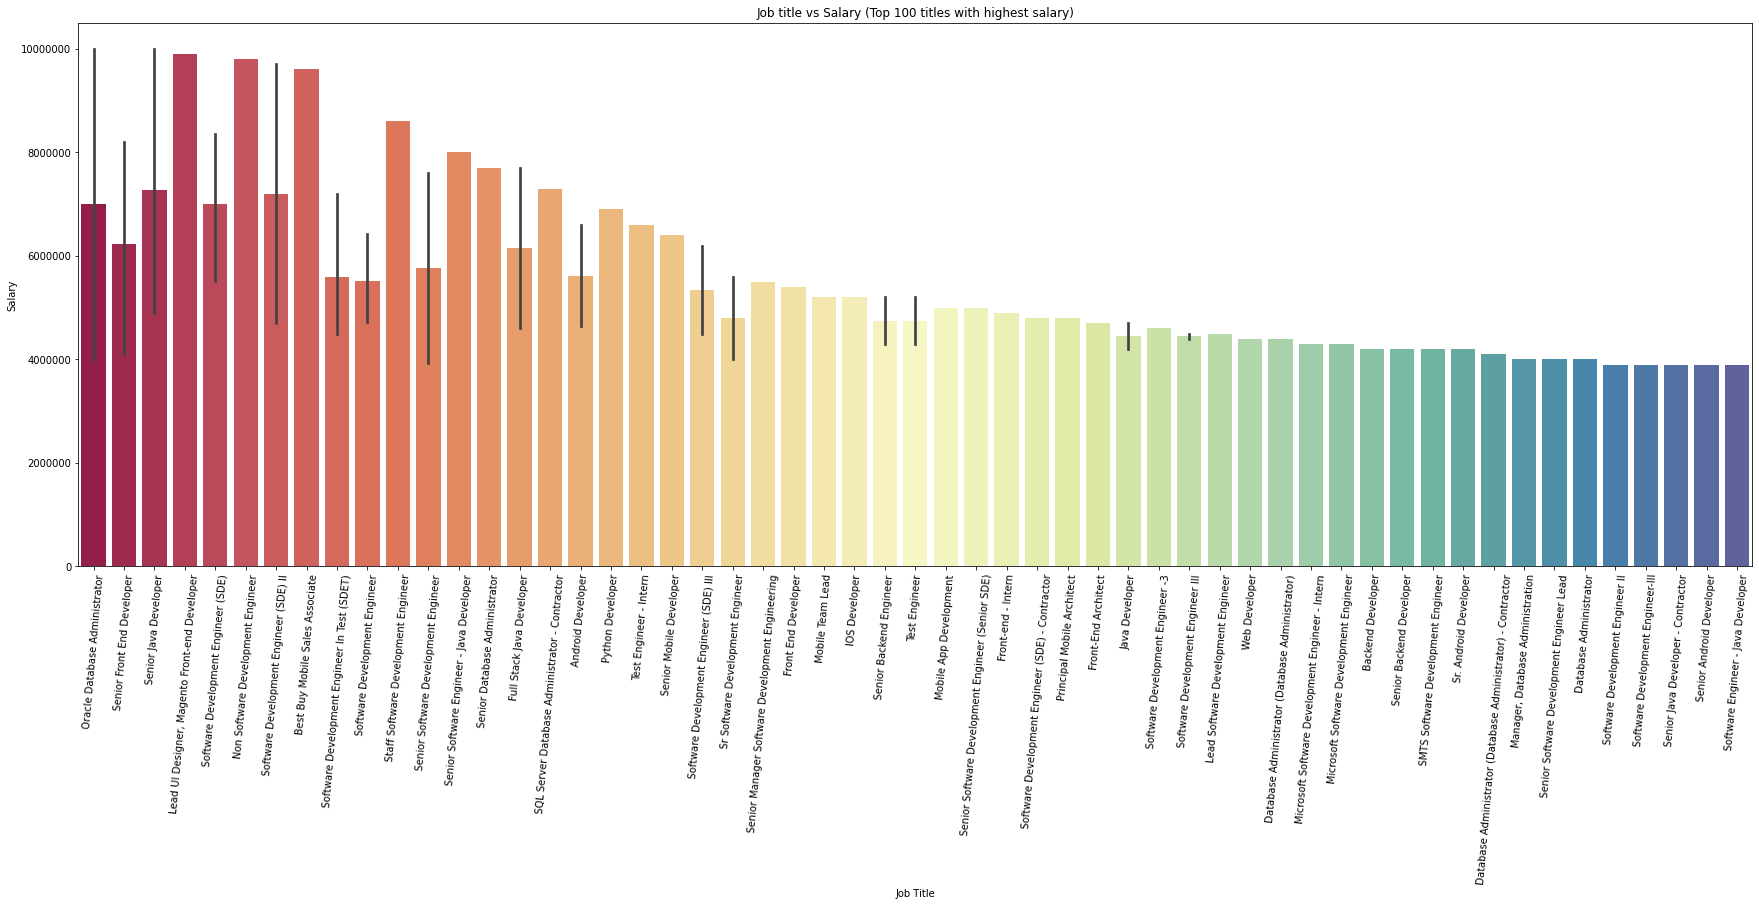

In [427]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary",axis=0,ascending=False,inplace=True)
sns.barplot(x=salary["Job Title"][1:100], y = salary["Salary"] ,orient="v", palette = "Spectral").set(title='Job title vs Salary (Top 100 titles with highest salary)');

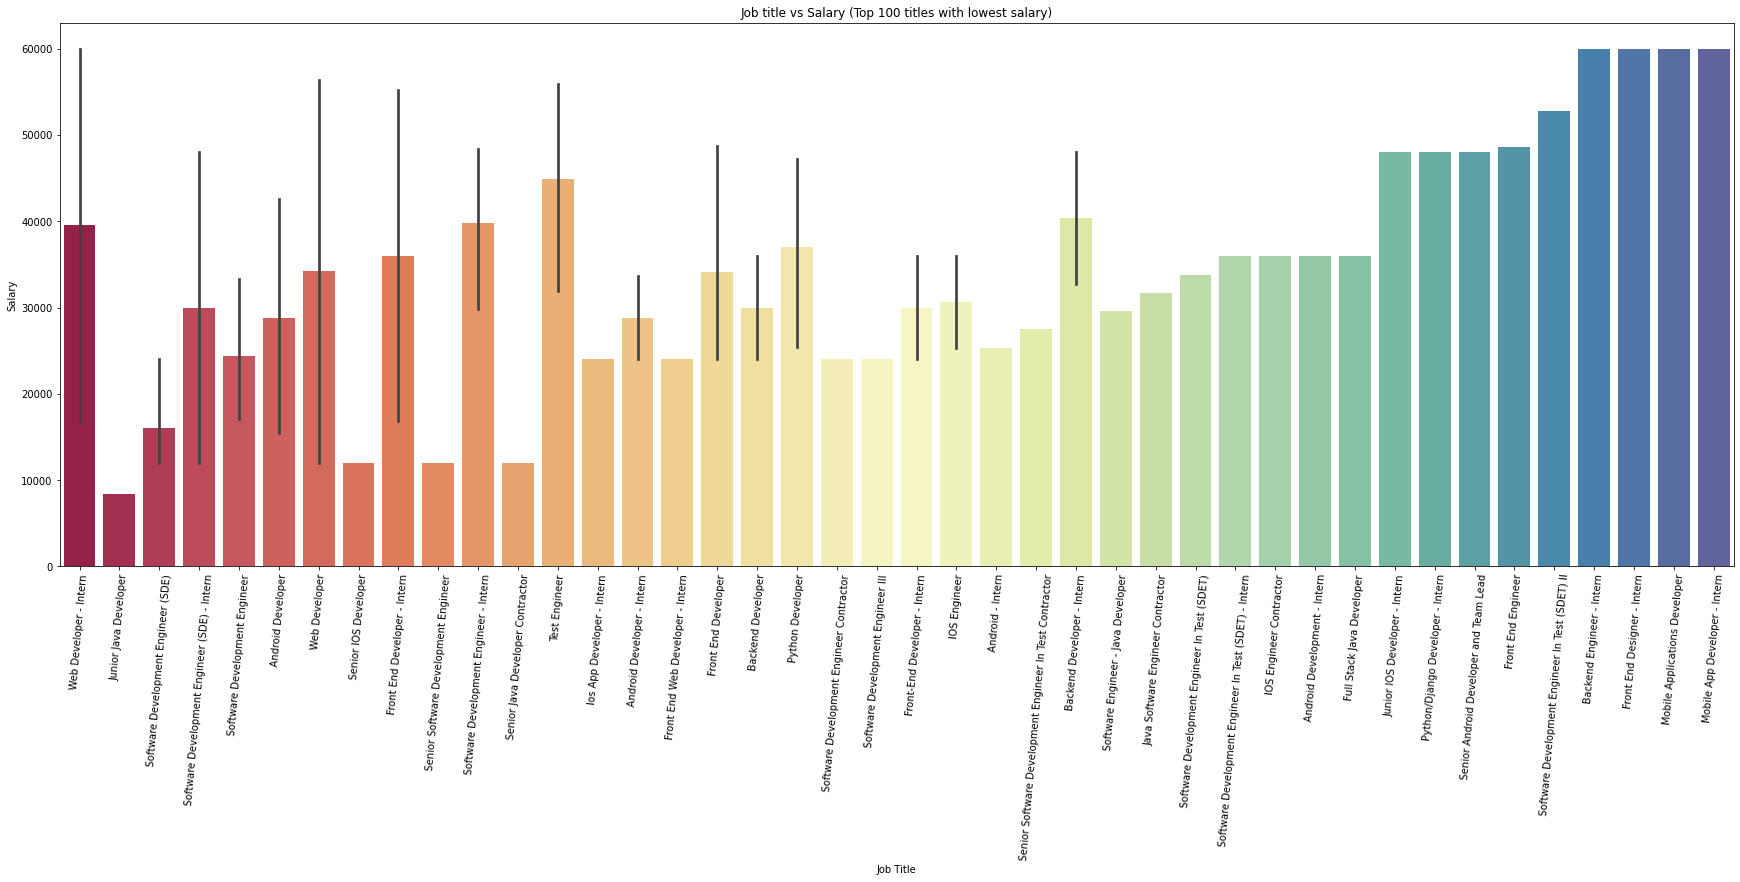

In [428]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = salary["Job Title"][0:100], y = salary["Salary"] ,orient="v", palette = "Spectral").set(title='Job title vs Salary (Top 100 titles with lowest salary)');



> 2.8 How salary differs based on Job title and how location and rating have a weight on them?



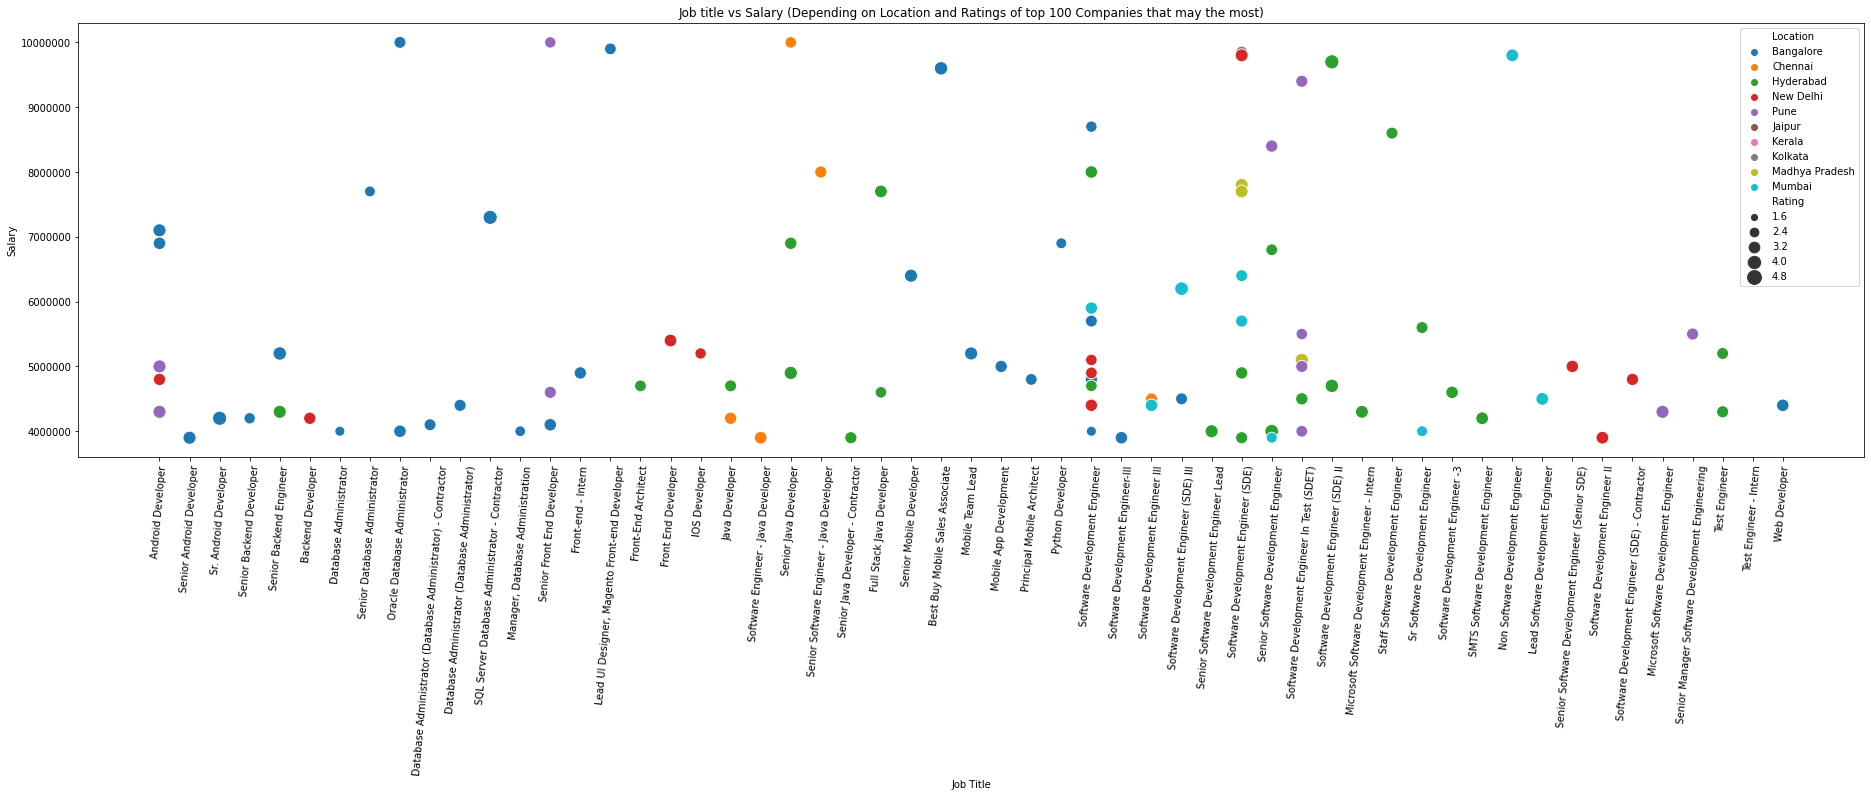

In [430]:
plt.figure(figsize = (32,8))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.scatterplot(data=salary, x=salary["Job Title"][1:100], y=salary["Salary"][:100],hue="Location", size='Rating', sizes=(10,200)).set(title='Job title vs Salary (Depending on Location and Ratings of top 100 Companies that pay the most)');
plt.legend(loc = "best")
plt.show()

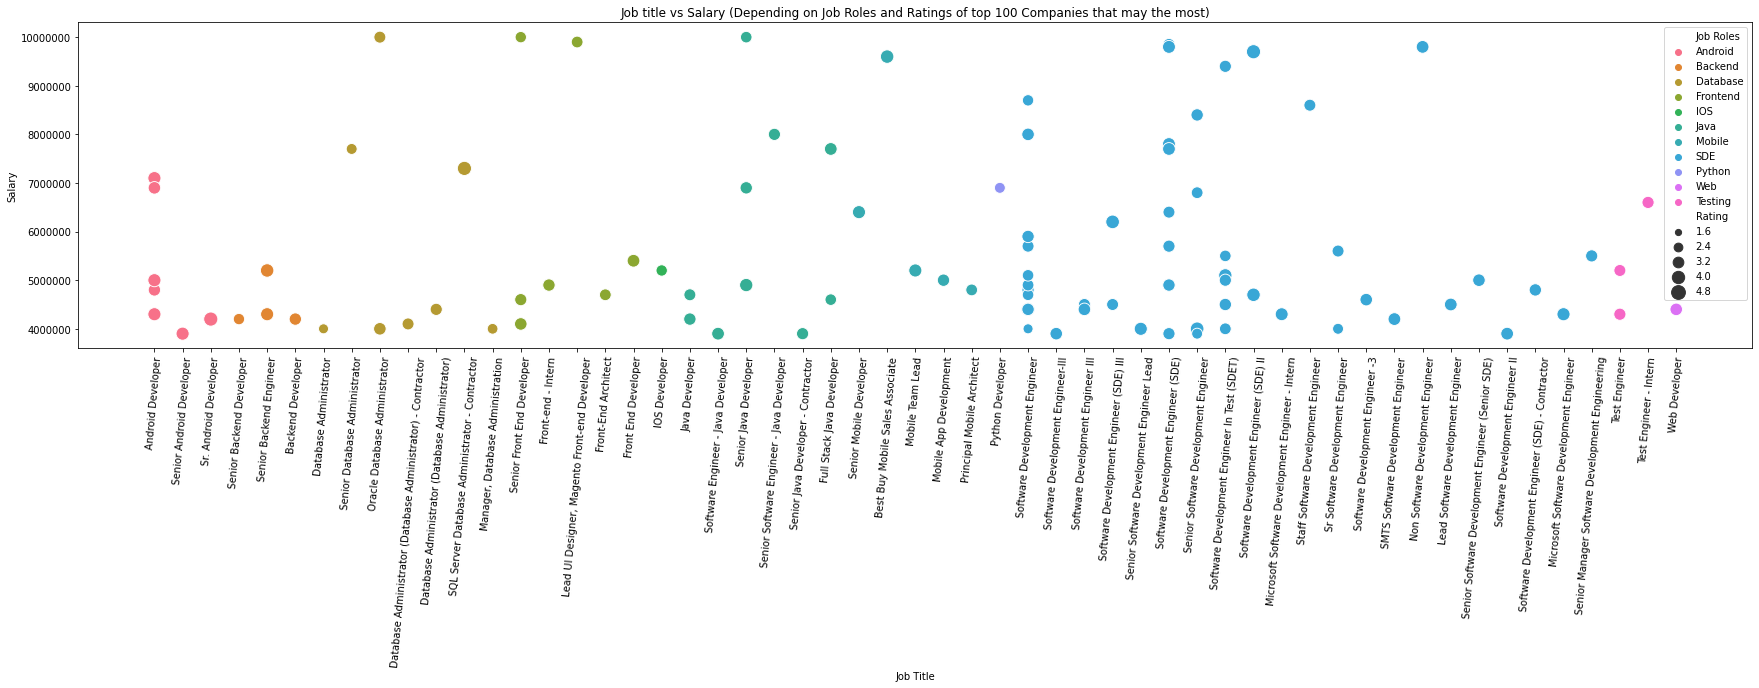

In [431]:
plt.figure(figsize = (30,6))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'Plain')
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.scatterplot(data=salary, x=salary["Job Title"][1:100], y=salary["Salary"],hue="Job Roles", size='Rating', sizes=(10,200)).set(title='Job title vs Salary (Depending on Job Roles and Ratings of top 100 Companies that may the most)');
plt.legend(loc = "best")

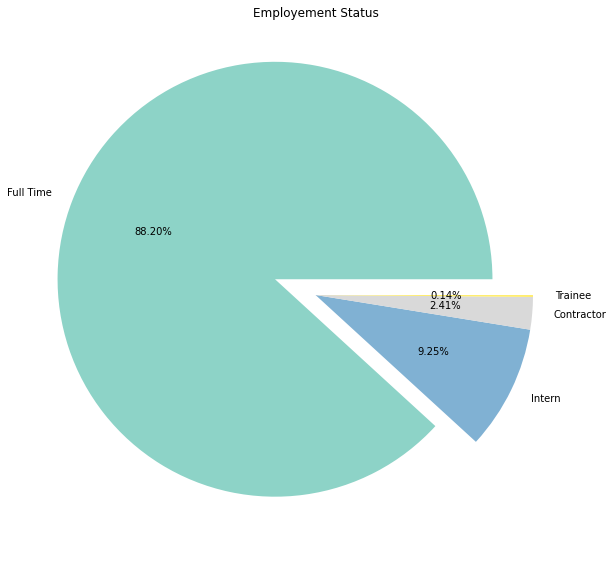

In [464]:
explode=(0.2,0,0,0)
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
salary["Employment Status"].value_counts().plot.pie(figsize=(10,10),explode=explode,autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

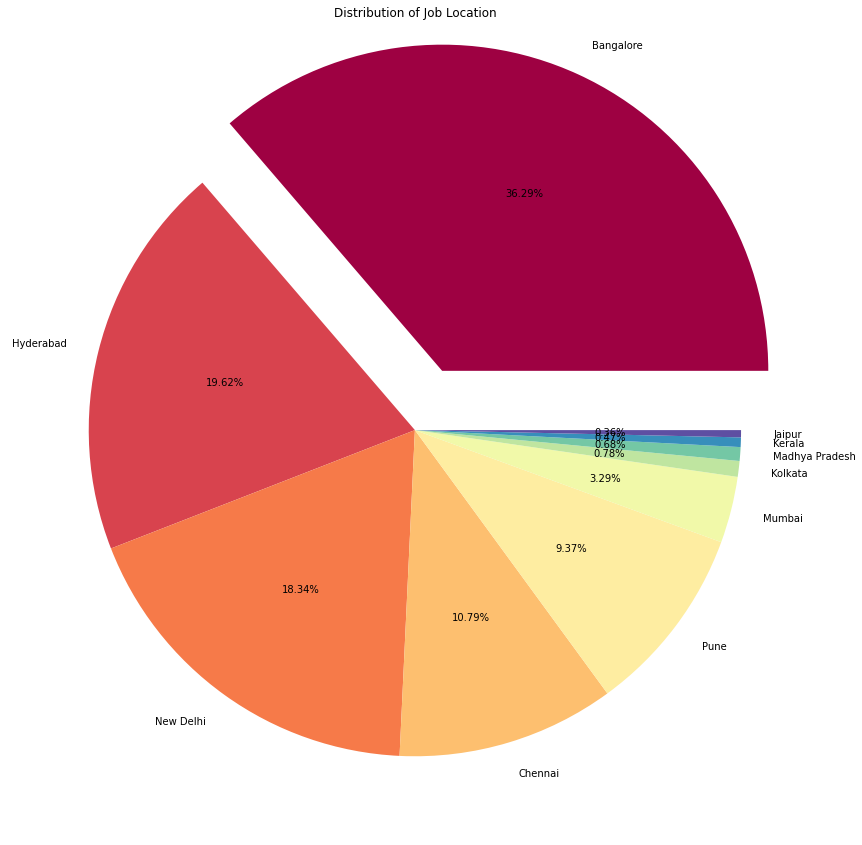

In [432]:
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
salary["Location"].value_counts().plot.pie(figsize = (20,15),explode=explode,autopct='%0.2f%%',colormap="Spectral",title='Distribution of Job Location');
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

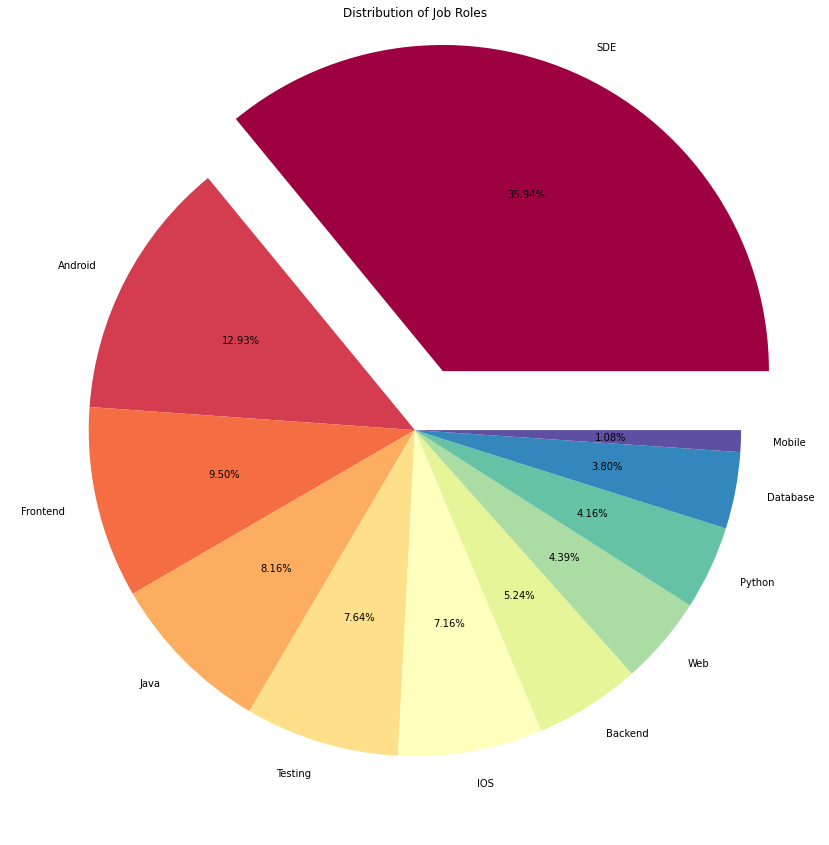

In [433]:
explode = (0.2,0,0,0,0,0,0,0,0,0,0)
salary["Job Roles"].value_counts().plot.pie(figsize=(20,15),explode=explode,autopct='%0.2f%%',colormap="Spectral",title="Distribution of Job Roles");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

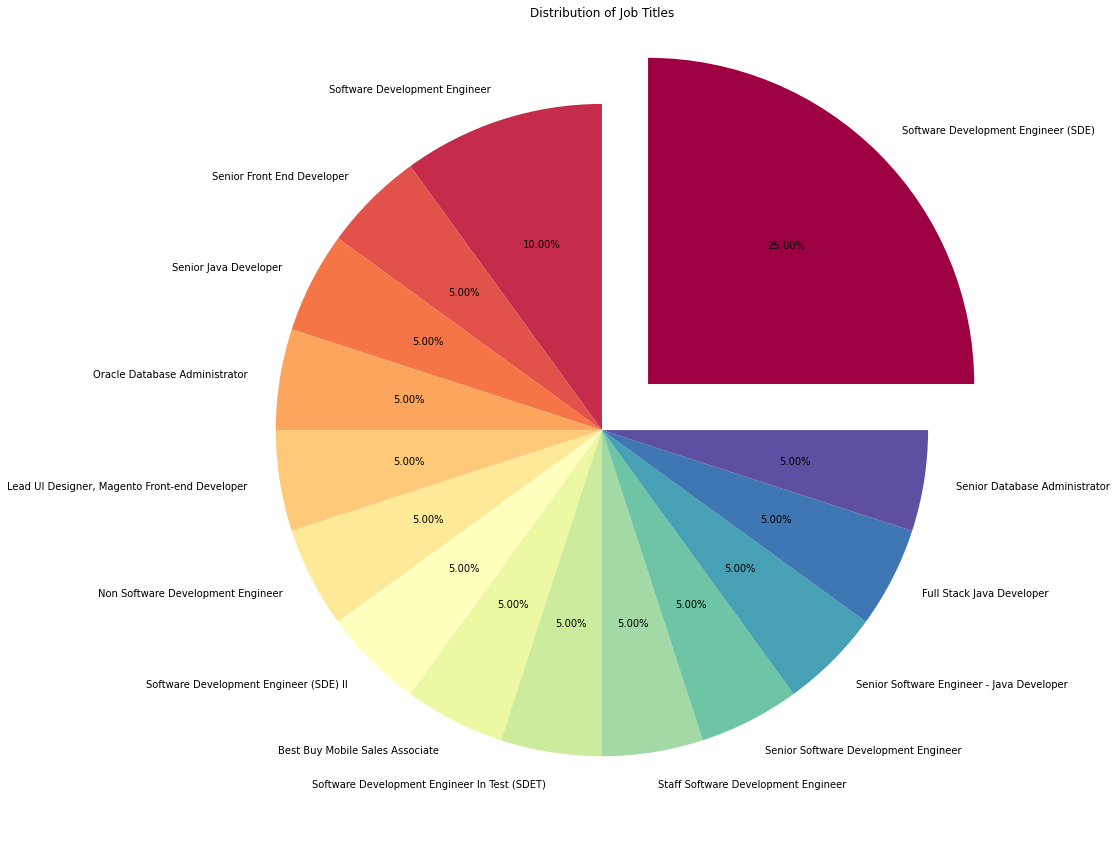

In [434]:
explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
salary.sort_values("Salary", axis = 0, ascending = False, inplace = True)
salary["Job Title"][:20].value_counts().plot.pie(figsize=(20,15),explode=explode,autopct='%0.2f%%',colormap="Spectral",title="Distribution of Job Titles");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
